# 数字信号处理python实现
## 主要用到的包
    scipy: 
    numpy:
    matplotlib:
    

scipy.signal 库的总结：https://blog.csdn.net/chehec2010/article/details/117109246
scipy.signal 官方总结：https://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal

## 导入包

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

1、离散时间信号序列的表示：

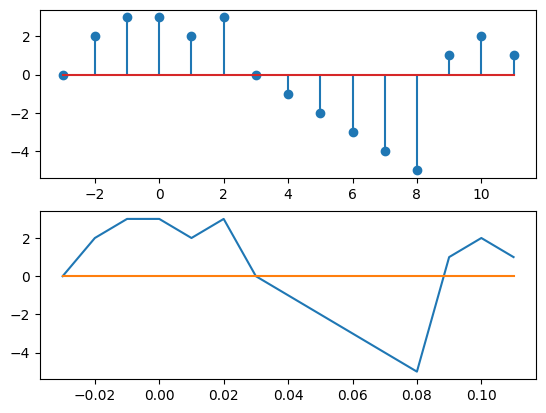

In [2]:
N=np.linspace(-3,11,15,dtype=int)
x=np.array([0,2,3,3,2,3,0,-1,-2,-3,-4,-5,1,2,1])
dt=0.01 # 定义时间间隔dt为0.01秒。
n=N*dt # 计算时间点n，即将数组N中的每个元素乘以时间间隔dt。
fig=plt.figure() # 创建一个matplotlib的图形对象fig。
ax1=fig.add_subplot(2,1,1)
ax1.stem(N,x) # 在子图ax1中绘制N和x的.stem图，这是一种特殊的图表，用于显示离散数据。
ax2=fig.add_subplot(2,1,2)
ax2.plot(n,x)
ax2.plot(n,np.zeros(len(n)))

 2、采样定理：
    对于一个最高频率成分有限制的连续时间信号，如果以至少两倍的最高频率（称为奈奎斯特频率）进行均匀采样，那么原始连续信号可以完全由这些采样值确定，并且可以通过适当的数学方法从这些采样值中无失真地重建原始信号。用数学语言来描述，如果一个连续时间信号$x(t)$包含的最高频率成分为$f_{max}$，则采样频率$f_s$ 必须满足以下条件：
    $$ f_s > 2f_{max} $$ 这里$f_s$表示每秒钟采样的次数，单位是Hz。

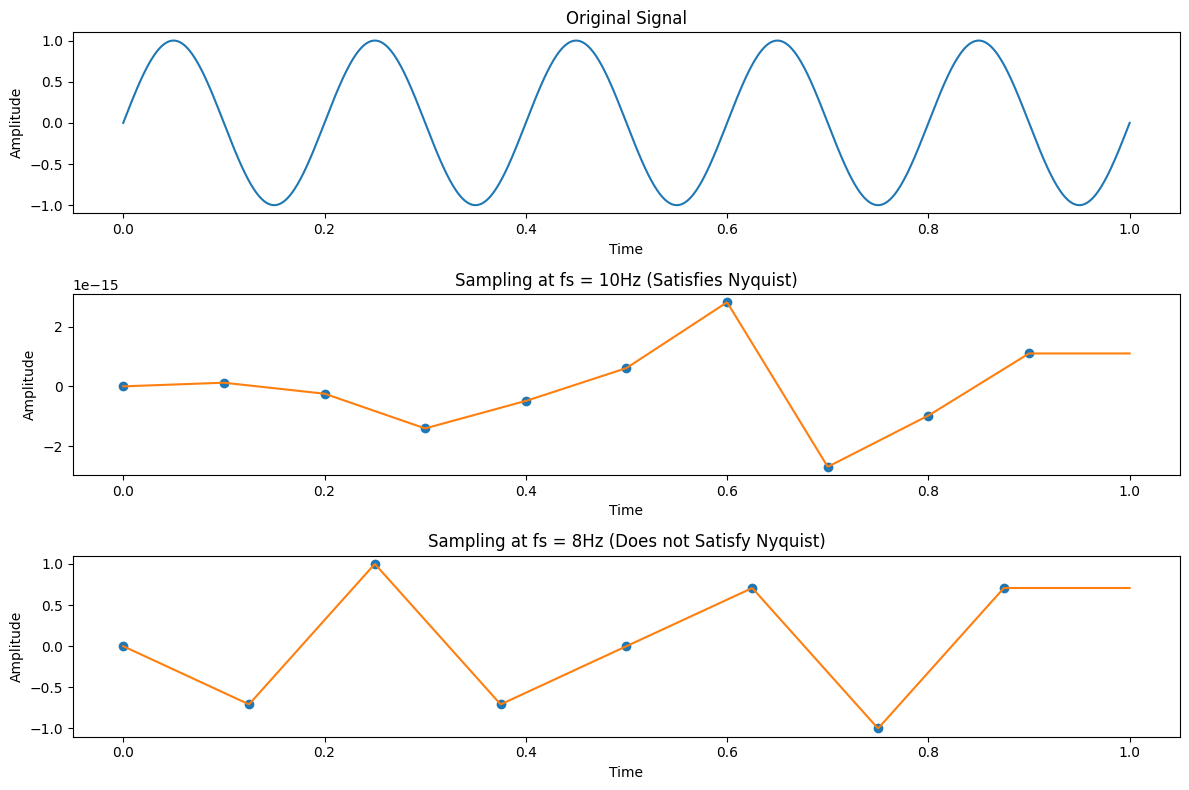

In [10]:
# 生成连续时间信号
t = np.linspace(0, 1, 1000)  # 时间向量
f = 5  # 信号频率
x = np.sin(2 * np.pi * f * t)  # 原始信号

# 设置不同的采样频率
fs1 = 10  # 满足采样定理的采样频率
fs2 = 8   # 不满足采样定理的采样频率

# 采样
t_s1 = np.linspace(0, 1, fs1, endpoint=False)
t_s2 = np.linspace(0, 1, fs2, endpoint=False)
x_s1 = np.sin(2 * np.pi * f * t_s1)
x_s2 = np.sin(2 * np.pi * f * t_s2)

# 重建信号
t_interp = np.linspace(0, 1, 1000)
x_recon1 = np.interp(t_interp, t_s1, x_s1)
x_recon2 = np.interp(t_interp, t_s2, x_s2)

# 绘制图形
plt.figure(figsize=(12, 8))

# 原始信号
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 满足采样定理的采样和重建
plt.subplot(3, 1, 2)
plt.plot(t_s1, x_s1, 'o', label='Sampled Points')
plt.plot(t_interp, x_recon1, label='Reconstructed Signal')
plt.title('Sampling at fs = 10Hz (Satisfies Nyquist)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 不满足采样定理的采样和重建
plt.subplot(3, 1, 3)
plt.plot(t_s2, x_s2, 'o', label='Sampled Points')
plt.plot(t_interp, x_recon2, label='Reconstructed Signal')
plt.title('Sampling at fs = 8Hz (Does not Satisfy Nyquist)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 显示图形
plt.tight_layout()
plt.show()


3、单位阶跃函数：

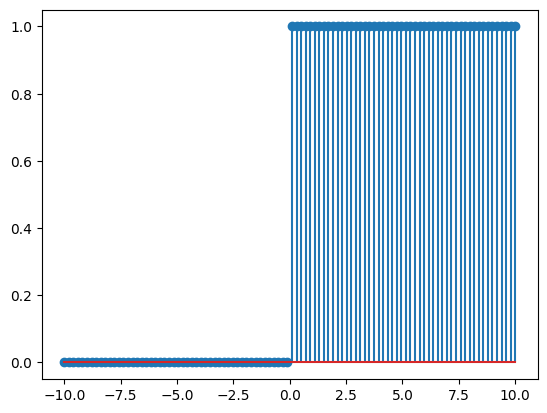

In [14]:
def unit_step_function(t):
    return np.where(t >= 0, 1, 0)
# 测试单位阶跃函数
t_values = np.linspace(-10, 10, 100)
h_values = unit_step_function(t_values)
plt.stem(t_values,h_values)
plt.show()

<StemContainer object of 3 artists>

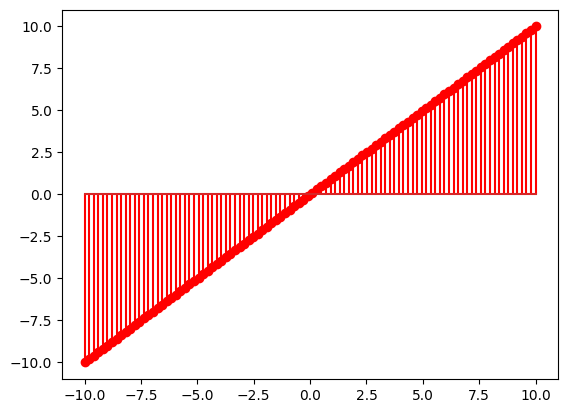

In [16]:
plt.stem(t_values,t_values,'r')